# Smoking is bad

In [1]:
#!pip install altair
#!pip install seaborn
#!pip install scikit-learn

In [29]:
# TODO: install all the necessary packages
import numpy as np
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
print(Path.cwd())

/Users/iremsara/Desktop/Cambridge/Economics and Data Science/D100- Fundamentals of Data Science/Classes/ps_2_ex2_smoking_is_bad


In [4]:
# TODO: load the data using the pathlib library to create the path to your data
path_to_data = Path.cwd() / "data" / "smoking_data.csv"
data = pd.read_csv(path_to_data)
data.head()

,Unnamed: 0,outcome,smoker,age,gender,salary
0,0,Alive,Yes,23,female,7286.0
1,1,Alive,Yes,18,male,NaN
2,2,Dead,Yes,71,male,NaN
3,3,Alive,No,67,male,NaN
4,4,Alive,No,64,female,20123.0


In [5]:
# TODO: what are the dimensions of the data frame?
# the data has 1,314 observations and 6 columns
print(data.shape)

(1314, 6)


In [6]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
# no description is provided for string columns
print("Statistical summary of the data:")
print(data.describe())

print("\n" + "="*50)
print("Information for all columns (incl. non-numeric):")
print(data.describe(include="all"))


Statistical summary of the data:
        Unnamed: 0          age        salary
count  1314.000000  1314.000000    614.000000
mean    656.500000    46.920091  48737.265472
std     379.463437    17.432027  28575.395264
min       0.000000    18.000000   1215.000000
25%     328.250000    32.000000  24112.250000
50%     656.500000    46.000000  48692.000000
75%     984.750000    61.000000  72946.250000
max    1313.000000    84.000000  99677.000000

Information for all columns (incl. non-numeric):
         Unnamed: 0 outcome smoker          age gender        salary
count   1314.000000    1314   1314  1314.000000   1314    614.000000
unique          NaN       2      2          NaN      2           NaN
top             NaN   Alive     No          NaN   male           NaN
freq            NaN     945    732          NaN    693           NaN
mean     656.500000     NaN    NaN    46.920091    NaN  48737.265472
std      379.463437     NaN    NaN    17.432027    NaN  28575.395264
min        0.000000 

In [7]:
# TODO: do not forget to check the null values
# we see that 700 observations do not have any data on salaries
print("Missing values:")
print(data.isnull().sum())

print("=" * 50)
print('Percentage of observations missing:')
print(round(data.isnull().sum() / len(data) * 100, 2))

Missing values:
Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64
Percentage of observations missing:
Unnamed: 0     0.00
outcome        0.00
smoker         0.00
age            0.00
gender         0.00
salary        53.27
dtype: float64


In [8]:
data.head()

,Unnamed: 0,outcome,smoker,age,gender,salary
0,0,Alive,Yes,23,female,7286.0
1,1,Alive,Yes,18,male,NaN
2,2,Dead,Yes,71,male,NaN
3,3,Alive,No,67,male,NaN
4,4,Alive,No,64,female,20123.0


In [ ]:
# For inference, we need to convert outcome, smoker and gender columns to binary variables
# Rename columns and drop unnamed
# we need to decide what do with the missing observations (fill with mean/ fill with median/ drop?)
# why are we using data on salaries in the exercise? 
# If we drop all obs with missing salary then we will lose 53% of our sample and end up with approx. 600 values
# if we impute then we need to add a new column, indicating whether the data was originally missing
# can we figure out from which country this data is from - what is the average life expectancy 

In [10]:
# TODO: prepare your data frame so that you can work with
data.drop(columns='Unnamed: 0', inplace=True)

In [11]:
data.columns = ['Alive', 'Smoker', 'Age', 'Female', 'Salary']  
data.dropna(subset='Salary')

,Alive,Smoker,Age,Female,Salary
0,Alive,Yes,23,female,7286.0
4,Alive,No,64,female,20123.0
6,Alive,Yes,45,female,45895.0
9,Alive,No,27,female,73991.0
10,Alive,No,28,male,8860.0
...,...,...,...,...,...
1305,Dead,No,55,male,35187.0
1306,Alive,No,40,female,36311.0
1307,Alive,No,33,female,64178.0
1308,Alive,No,23,female,86266.0


In [12]:
list_ops = set(data['Alive'].to_list())
list_ops

{'Alive', 'Dead'}

In [13]:
print(data.columns)
print(data.dtypes)

Index(['Alive', 'Smoker', 'Age', 'Female', 'Salary'], dtype='object')
Alive      object
Smoker     object
Age         int64
Female     object
Salary    float64
dtype: object


In [14]:
data['Alive'] = data['Alive'].str.strip().map({'Alive': 1, 'Dead': 0})
data['Smoker'] = data['Smoker'].str.strip().map({'Yes': 1, 'No': 0})

In [15]:
data['Female']= data['Female'].str.strip().map({'female': 1, 'male': 0})

In [ ]:
data.dropna(subset='Salary', inplace=True)
print(f"After dropping missing observations for salary, our sample has {data.shape[0]} observations.")
data.head()

After dropping missing observations for salary, our sample has 614 observations.


,Alive,Smoker,Age,Female,Salary
0,1,1,23,1,7286.0
4,1,0,64,1,20123.0
6,1,1,45,1,45895.0
9,1,0,27,1,73991.0
10,1,0,28,0,8860.0


In [ ]:
# We may bin the salary data given it is unlikely we are interested in exact salary which will have wide variation
# We may also want to bin age so we are looking age groups instead of the exact age
# is there a correlation between lower wage = worse living standards, lesser access to healthcare (make 4 bins for salary)

# we make 5 groups for age
est = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
dft = est.fit_transform(data[['Age']])
print(est.bin_edges_) #bins
age_bins = dft.flatten().astype(int)
age_labels = ['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly']
data['Age Groups'] = pd.Categorical.from_codes(age_bins, categories=age_labels, ordered=True)
data.head()

[array([18. , 31.2, 44.4, 57.6, 70.8, 84. ])]


,Alive,Smoker,Age,Female,Salary,Age Groups
0,1,1,23,1,7286.0,Young
4,1,0,64,1,20123.0,Senior
6,1,1,45,1,45895.0,Middle-Aged
9,1,0,27,1,73991.0,Young
10,1,0,28,0,8860.0,Young


count      614
mean     48737
std      28575
min       1215
25%      24112
50%      48692
75%      72946
max      99677
Name: Salary, dtype: int64


<Axes: >

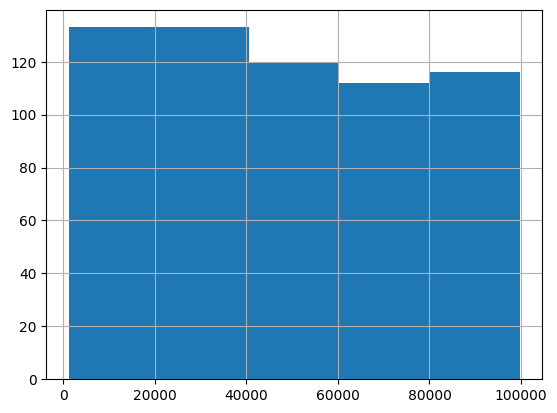

In [ ]:
# Making bins for Salary as well 
# checking some characteristics
print(data['Salary'].describe().astype(int))
# checking if the data is potentially skewed to decide how to discretize the data
data['Salary'].hist(bins=5) # looks quite uniform, so we will use strategy = uniform

In [49]:
# Making 4 uniform bins for salary
est_s = KBinsDiscretizer(n_bins=4, strategy='uniform', encode='ordinal')
dft_s = est_s.fit_transform(data[['Salary']])
print(est_s.bin_edges_)
salary_bins = dft_s.flatten().astype(int)
salary_labels = ['Low', 'Lower-middle', 'Upper-middle', 'High']
data['Earning groups'] = pd.Categorical.from_codes(salary_bins, categories=salary_labels, ordered=True)
data.reset_index(inplace=True)
data

[array([ 1215. , 25830.5, 50446. , 75061.5, 99677. ])]


,index,Alive,Smoker,Age,Female,Salary,Age Groups,Earning groups
0,0,1,1,23,1,7286.0,Young,Low
1,4,1,0,64,1,20123.0,Senior,Low
2,6,1,1,45,1,45895.0,Middle-Aged,Lower-middle
3,9,1,0,27,1,73991.0,Young,Upper-middle
4,10,1,0,28,0,8860.0,Young,Low
...,...,...,...,...,...,...,...,...
609,1305,0,0,55,0,35187.0,Middle-Aged,Lower-middle
610,1306,1,0,40,1,36311.0,Adult,Lower-middle
611,1307,1,0,33,1,64178.0,Adult,Upper-middle
612,1308,1,0,23,1,86266.0,Young,High


In [57]:
data['Age'].describe()

count    614.000000
mean      47.428339
std       17.071118
min       18.000000
25%       32.250000
50%       48.000000
75%       61.000000
max       84.000000
Name: Age, dtype: float64

In [65]:
# I will also add a column to indicate whether a person has lived past the average life expectancy
# average life expectancy in the US: for males - 76, for females 81
data['Exceed expectancy'] = ((data['Age'] >76) & (data['Female'] == 0)).astype(int)
data['Exceed expectancy'] = ((data['Age'] >81) & (data['Female'] == 1)).astype(int)
check = data[data['Exceed expectancy']==1]
check

,index,Alive,Smoker,Age,Female,Salary,Age Groups,Earning groups,Exceed expectancy
120,253,0,1,83,1,3941.0,Elderly,Low,1
225,504,0,0,82,1,21139.0,Elderly,Low,1
554,1174,0,0,84,1,62400.0,Elderly,Upper-middle,1


In [77]:
smoking_rate = data.groupby('Age Groups', observed=True)['Smoker'].mean()

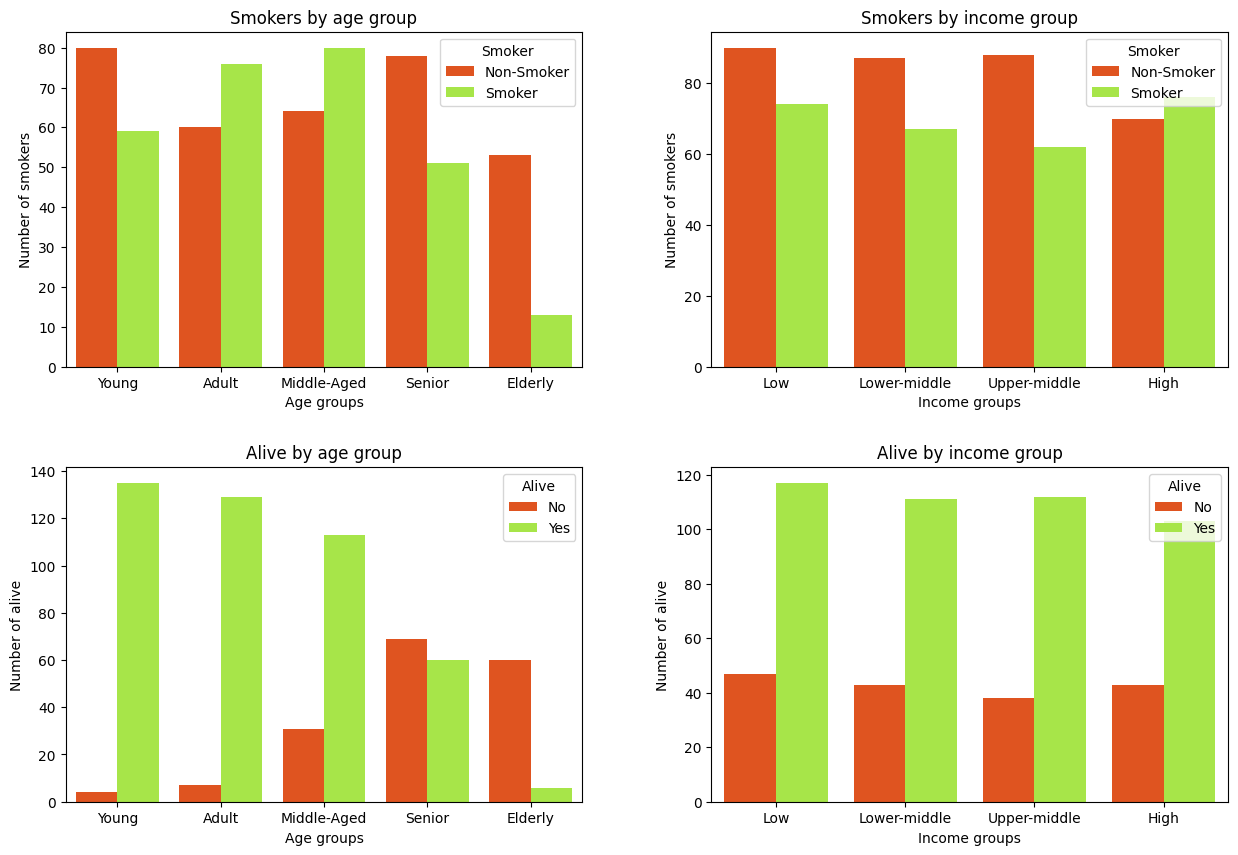

In [106]:
fig, axes = plt.subplots(2, 2, figsize= (15,10))
plt.subplots_adjust(
    wspace=0.25,  # horizontal space between subplots
    hspace=0.3   # vertical space between subplots
)


sns.countplot(data= data, x= 'Age Groups', hue='Smoker', palette=['OrangeRed', 'GreenYellow'] ,ax = axes[0,0])
axes[0,0].set_title('Smokers by age group')
axes[0,0].set_xlabel('Age groups')
axes[0,0].set_ylabel('Number of smokers')
axes[0,0].legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

sns.countplot(data=data, x = 'Earning groups', hue = 'Smoker',  palette=['OrangeRed', 'GreenYellow'], ax = axes[0,1])
axes[0,1].set_title('Smokers by income group')
axes[0,1].set_xlabel('Income groups')
axes[0,1].set_ylabel('Number of smokers')
axes[0,1].legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

sns.countplot(data= data, x= 'Age Groups', hue='Alive', palette=['OrangeRed', 'GreenYellow'] ,ax = axes[1,0])
axes[1,0].set_title('Alive by age group')
axes[1,0].set_xlabel('Age groups')
axes[1,0].set_ylabel('Number of alive')
axes[1,0].legend(title='Alive', labels=['No', 'Yes'])

sns.countplot(data=data, x = 'Earning groups', hue = 'Alive', palette=['OrangeRed', 'GreenYellow'], ax = axes[1,1])
axes[1,1].set_title('Alive by income group')
axes[1,1].set_xlabel('Income groups')
axes[1,1].set_ylabel('Number of alive')
axes[1,1].legend(title='Alive', labels=['No', 'Yes'])

plt.show()

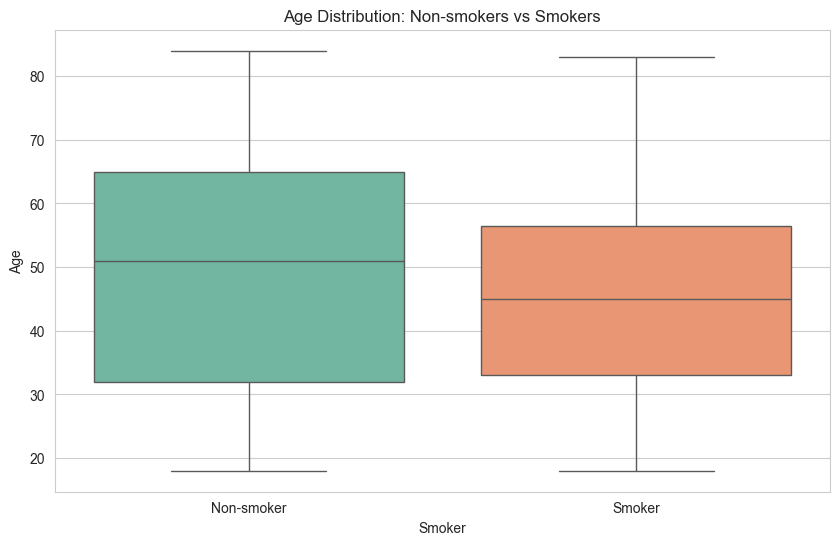

In [ ]:
# Probably a better representation of the above data
sns.set_style('whitegrid')

plt.figure(figsize=(10,6))
sns.boxplot(data=data, x = 'Smoker', y='Age', hue= 'Smoker', palette = 'Set2', legend = False)
plt.xticks([0,1], ['Non-smoker', 'Smoker'])
plt.title('Age Distribution: Non-smokers vs Smokers') # use categorical titles instead of 0 , 1
plt.ylabel('Age')
plt.show()




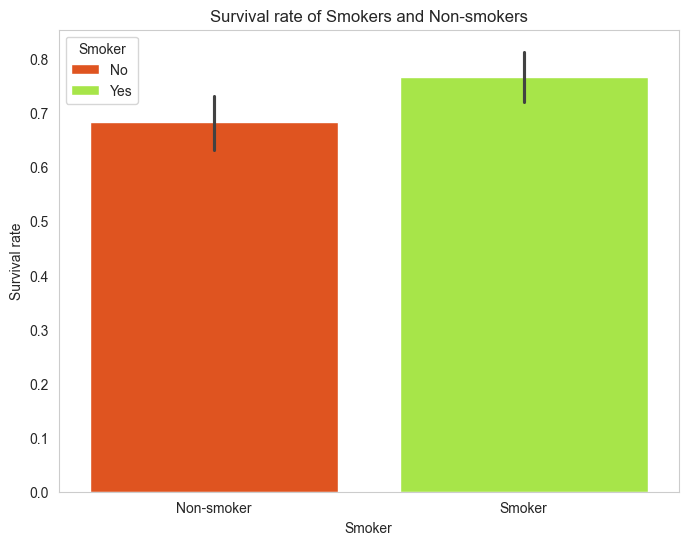

In [137]:
survival = data.groupby('Smoker')['Alive'].mean()
plt.figure(figsize = (8,6))
plt.grid(False)
sns.barplot(data= data, x = 'Smoker', y = 'Alive', hue ='Smoker', palette=['OrangeRed', 'GreenYellow'])
plt.title('Survival rate of Smokers and Non-smokers')
plt.ylabel('Survival rate')
plt.xticks([0,1], ['Non-smoker', 'Smoker'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title = 'Smoker')
plt.show()



In [ ]:
# sns.stripplot looks cool - can we use it for anything else
# add statistical details to get some summary

## Smoking analysis
Let's first check what your cousin did.

In [17]:
# TODO: Reimplement the small code snippet described in the problem set instructions.

You should get the same results.

# Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

In [ ]:
# scatter plot for alive for binned ages
# scatter plot for alive for binned salary

# scatter plot for alive for binned ages & smoker
# scatter plot for alive for binned salary

# scatter plots (maybe with a trend line?)
# bubble charts??